In [12]:
import numpy
from matplotlib import pyplot
import ipywidgets

%matplotlib inline

In [13]:
pyplot.rc('font',family='serif',size=16)

In [14]:
def rho_red_light(x, rho_max):
    rho = numpy.full_like(x, rho_max)
#     rho = rho_max *numpy.ones_like(x)
    mask = numpy.where(x<3.0)
    rho[mask] /= 2
#     rho[mask] = rho_max/2
    return rho

In [15]:
#set parameterts.
nx = 81
L = 4.0
dx = L / (nx-1)
x = numpy.linspace(0.0, L,num = nx)

rho_max = 10.0
u_max=1.0

rho0 = rho_red_light(x,rho_max)

In [16]:
def plot(n,x,rho_hist):
    pyplot.figure()
    pyplot.grid()
    pyplot.title('Time step:{}'.format(n))
    pyplot.xlabel('Road [km]')
    pyplot.ylabel('Traffic density [cars/hr]')
    pyplot.plot(x, rho_hist[n])
    pyplot.xlim(x[0],x[-1])
    pyplot.ylim(4.0 , 11.0)
    pyplot.show

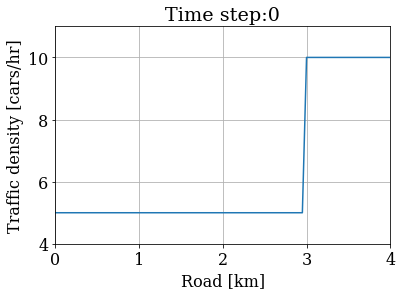

In [17]:
plot(0, x, [rho0])

In [18]:
def traffic_speed(rho, u_max,rho_max):
    return u_max * (1 - rho / rho_max)

def traffic_flux(rho, u_max, rho_max):
    return rho*traffic_speed(rho,u_max,rho_max)

In [19]:
def interactive_plot(x, rho_hist):
    nt = len(rho_hist) - 1
    nt_slider = ipywidgets.IntSlider(value=0,min=0,max=nt,step=1,descrption='Time step')
    w = ipywidgets.interactive(plot, n=nt_slider,x = ipywidgets.fixed(x),rho_hist = ipywidgets.fixed(rho_hist))
    return w

In [20]:
def lax_friedrichs(rho0,nt,dt,dx,u_max,rho_max):
    #need to create/initialize 'rho_hist'
    rho_hist = [rho0.copy()]
    #need to compute solution of at each time step.
    rho = rho0.copy()
    nx = len(rho0)
    nx = rho0.size
    for n in range(nt):
        rhon = rho.copy()
        F = traffic_flux( rhon, u_max, rho_max)
        for i in range(1,nx-1):
            rho[i] = (0.5*(rhon[i - 1]+rhon[i+1]) - dt *(F[i+1] - F[i-1])/(2*dx))
#             rho[1:-1] = (0.5 *(rhon[:-2]+rhon[2:]) -dt*(F[2:] - F[:-2]/dx))
            rho_hist.append(rho.copy())
    #what about boundary condition?
    return rho_hist

In [21]:
nt = 40
sigma = 1.0
dt = sigma*dx / u_max

rho_hist = lax_friedrichs(rho0,nt,dt,dx,u_max,rho_max)

interactive_plot(x,rho_hist)

interactive(children=(IntSlider(value=0, description='n', max=3160), Output()), _dom_classes=('widget-interact…

In [22]:
sigma = 0.5
dt = sigma*dt/u_max
nt = 80
rho_hist = lax_friedrichs(rho0,nt,dt,dx,u_max,rho_max)

interactive_plot(x,rho_hist)

interactive(children=(IntSlider(value=0, description='n', max=6320), Output()), _dom_classes=('widget-interact…

In [26]:
def traffic_jacobian(rho,u_max,rho_max):
    J = u_max *(1-2*rho/rho_max)
    return
def lax_wendroff(rho0,nt,dt,dx,u_max,rho_max):
    rho_hist = [rho0.copy()]
    rho = rho0.copy()
    for n in range(nt):
        F = traffic_flux(rho, u_max, rho_max)
        J = traffic_jacobian(rho,u_max,rho_max)
        rho[1:-1] = (rho[1:-1] - dt*(F[2:]-F[:-2])/(2 *dx) + dt**2/ (4*dx**2) * ((J[1:-1]+J[2:])*(F[2:]-F[1:-1])) - ((J[:-2]+J[1:-1])*(F[1:-1]- F[:-2]))
   
        rho_hist.append(rho.copy())
        return rho_hist

SyntaxError: invalid syntax (<ipython-input-26-75a3137dc918>, line 12)